In [93]:
import os
import tarfile
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno # plot missing value counts

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Common imports
import numpy as np
import pandas as pd
import math

In [24]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATA_PATH = os.path.join("datasets", "housing")
DATA_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "eda"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [25]:
def fetch_data(data_url=DATA_URL, data_path=DATA_PATH):
    '''This function fetches the data from the given url
    and saves it in a local repository'''
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path, "housing.tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = tarfile.open(tgz_path)
    data_tgz.extractall(path=data_path)
    data_tgz.close()
    
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path)

In [26]:
fetch_data() # fetch data from the url
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
# High level info about the dataset
print(housing.info(verbose=True, null_counts=True))
print('\nMissing value counts \n')
print(housing.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Missing value counts 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_v

In [28]:
print('\nData Description \n')
df_description_num = housing.describe()
df_description_num


Data Description 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
# Describing all the Categorical Features
df_description_cat = housing.describe(include=['O'])
df_description_cat

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [30]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    save_fig("feature_distribution")
            

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/Users/rai00007/venv-tf2/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rai00007/venv-tf2/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rai00007/venv-tf2/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

Saving figure feature_distribution


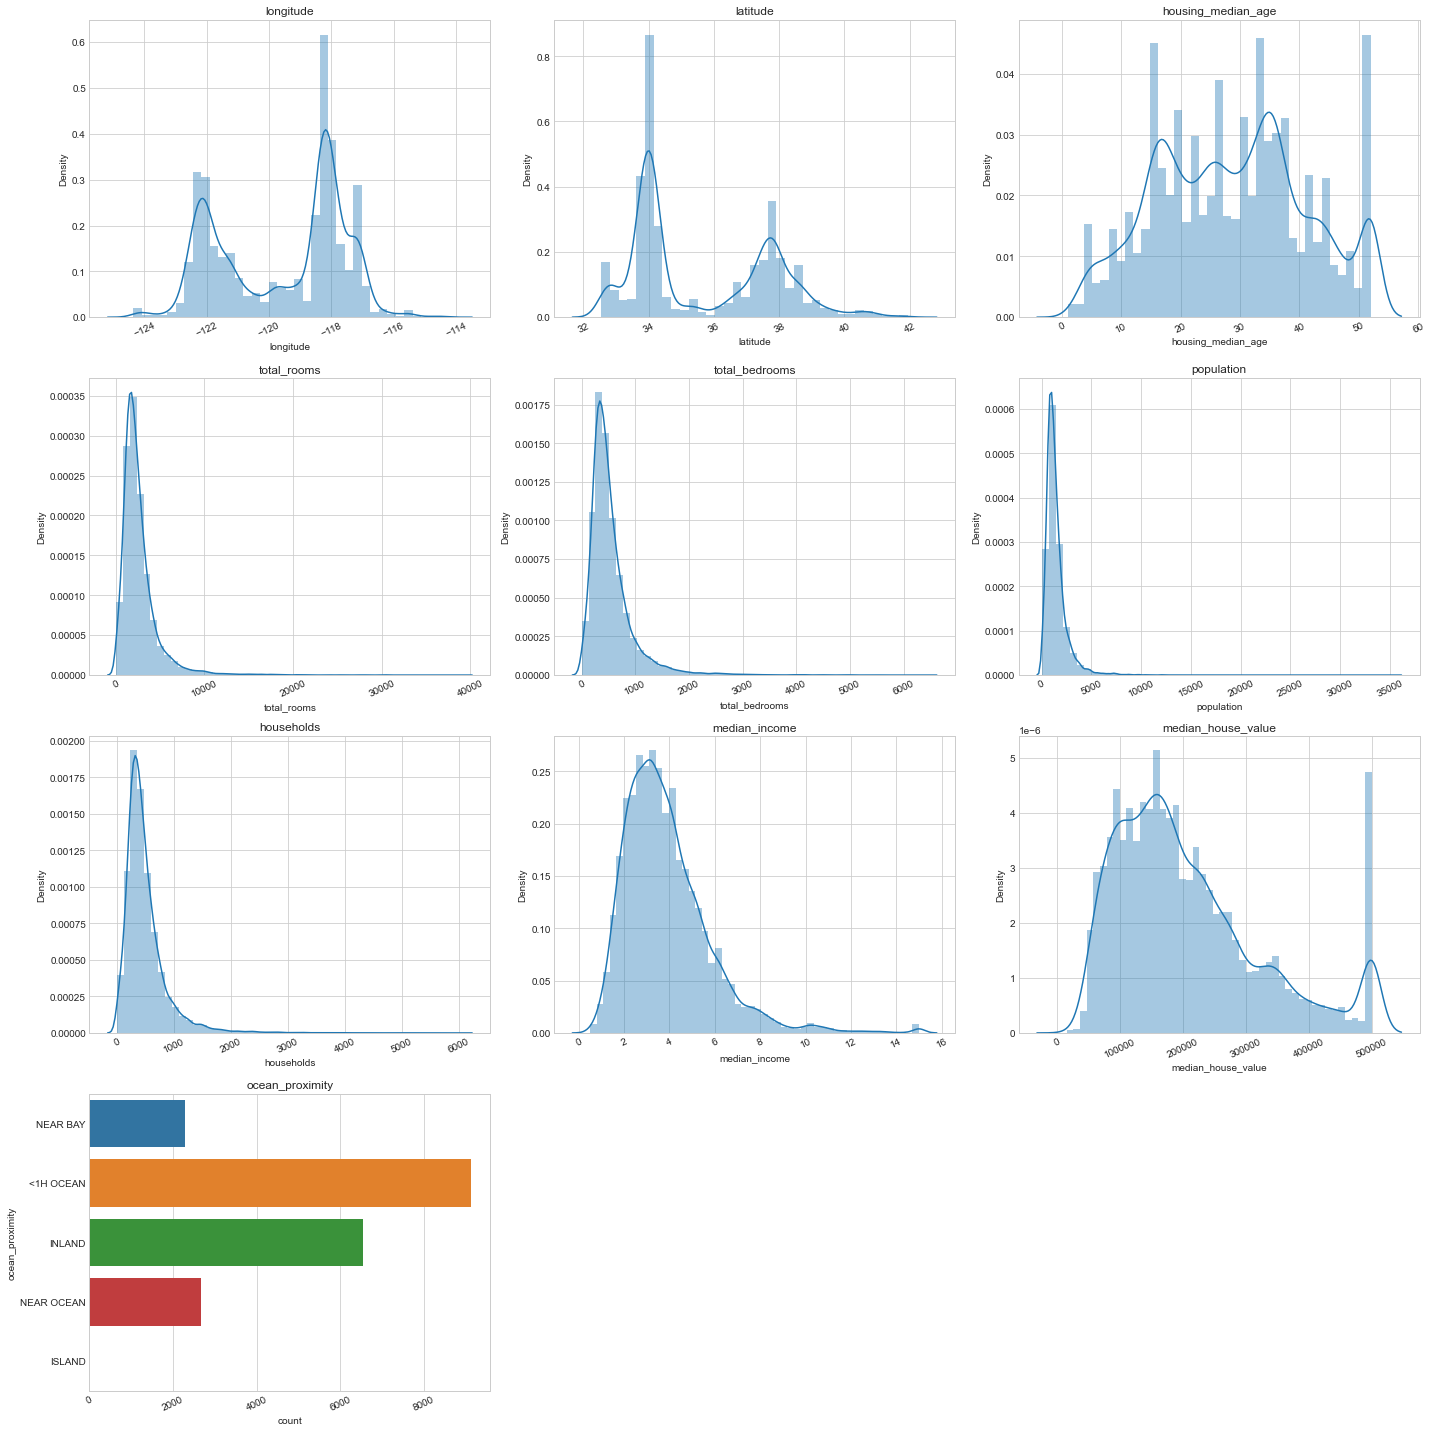

In [35]:
fetch_data() # fetch data from the url
housing = load_data()
plot_distribution(housing, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

Saving figure missing_values


<ipython-input-30-15ef312464f7>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


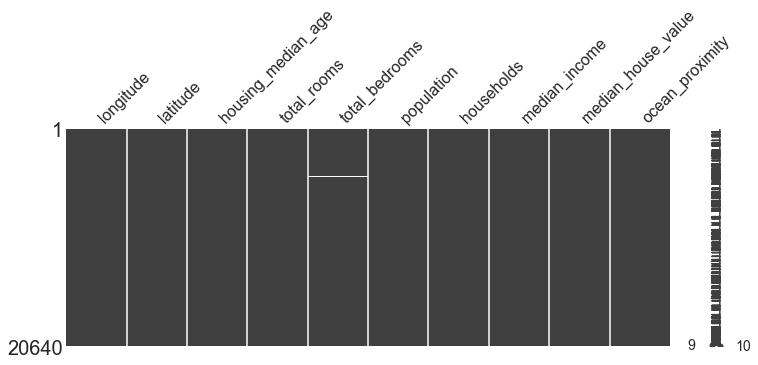

In [36]:
# How many missing values are there in our dataset?
pt = missingno.matrix(housing, figsize = (12,4))
save_fig("missing_values")

In [38]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Saving figure pearson's correlation


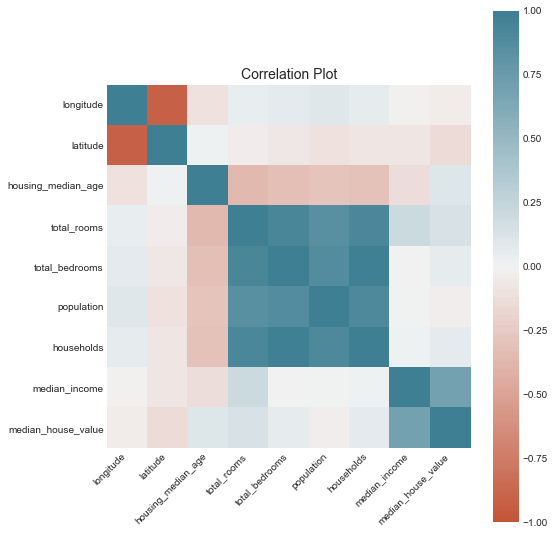

In [51]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation Plot', fontsize=14)
save_fig("pearson's correlation")

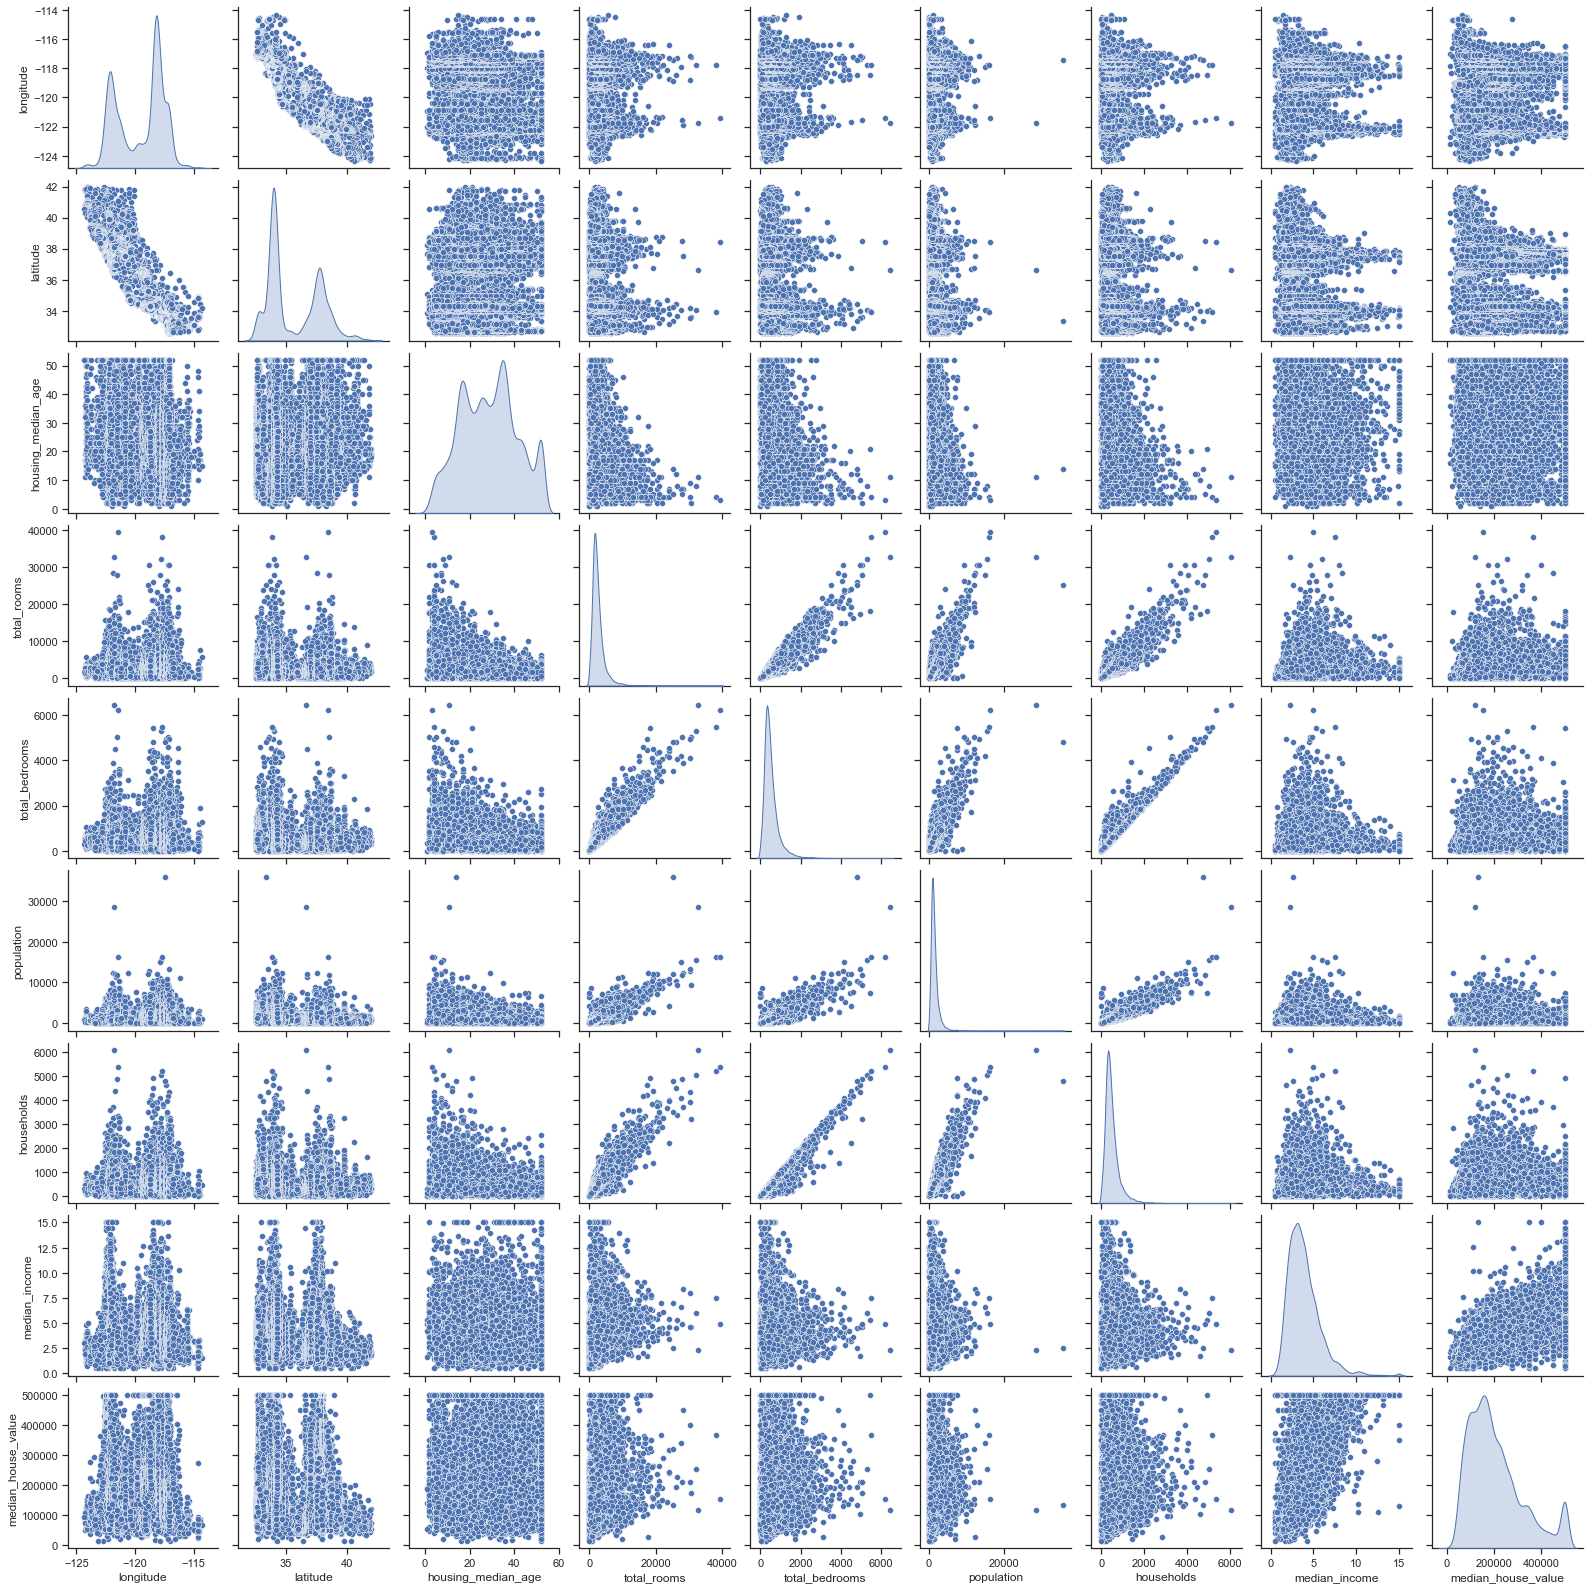

In [64]:
sns.set_theme(style="ticks")
sns.pairplot(housing, diag_kind='kde')

In [9]:
# %%writefile utils/eda.py

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno # plot missing value counts

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Common imports
import numpy as np
import pandas as pd
import math
import os


class Eda:
    '''This class creates some essential plots required to get 
    a priliminary understanding of data.
    input: 
    csv_file: It takes in tabular data in form of a CSV file format
    
    output: it generates plots in the .png file format
    '''
    
    def __init__(self, DATA_PATH, cols=5, width=20, height=15):
        self.data_path = DATA_PATH
        self.cols = cols
        self.width = width
        self.height = height
        
    def load_data(self):
        csv_path = os.path.join(self.data_path, "housing.csv")
        dataset = pd.read_csv(csv_path)
        return dataset
    
    # Let’s plot the distribution of each feature
    def plot_distribution(self, hspace=0.2, wspace=0.5):
        """This function draws standard distributions for 
        numerical and categorical variable"""
        dataset=self.load_data()
        print(dataset.shape)
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure(figsize=(self.width,self.height))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
        rows = math.ceil((dataset.shape[1]) / self.cols)
        for i, column in enumerate(dataset.columns):
            ax = fig.add_subplot(rows, self.cols, i + 1)
            ax.set_title(column)
            if dataset.dtypes[column] == np.object:
                g = sns.countplot(y=column, data=dataset)
                substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
                g.set(yticklabels=substrings)
                plt.xticks(rotation=25)
            else:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
        # save_fig("feature_distribution")
        
    def plot_missingvalues(self):
        dataset=self.load_data()
        missingno.matrix(dataset, figsize = (12,4))
        
    def get_correlation(self):
        dataset=self.load_data()
        corr_matrix = dataset.corr()
        return corr_matrix
        
        
    def plot_correlation(self):
        corr_matrix = self.get_correlation()
        plt.figure(figsize=(8, 8))
        ax = sns.heatmap(
            corr_matrix, 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True
        )
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right'
        )
        ax.set_title('Correlation Plot', fontsize=14)
        
    def get_scatterplot_matrix(self):
        dataset=self.load_data()
        sns.set_theme(style="ticks")
        sns.pairplot(dataset, diag_kind='kde')


#     def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#         path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#         print("Saving figure", fig_id)
#         if tight_layout:
#             plt.tight_layout()
#         plt.savefig(path, format=fig_extension, dpi=resolution)

Writing utils/eda.py


(20640, 10)


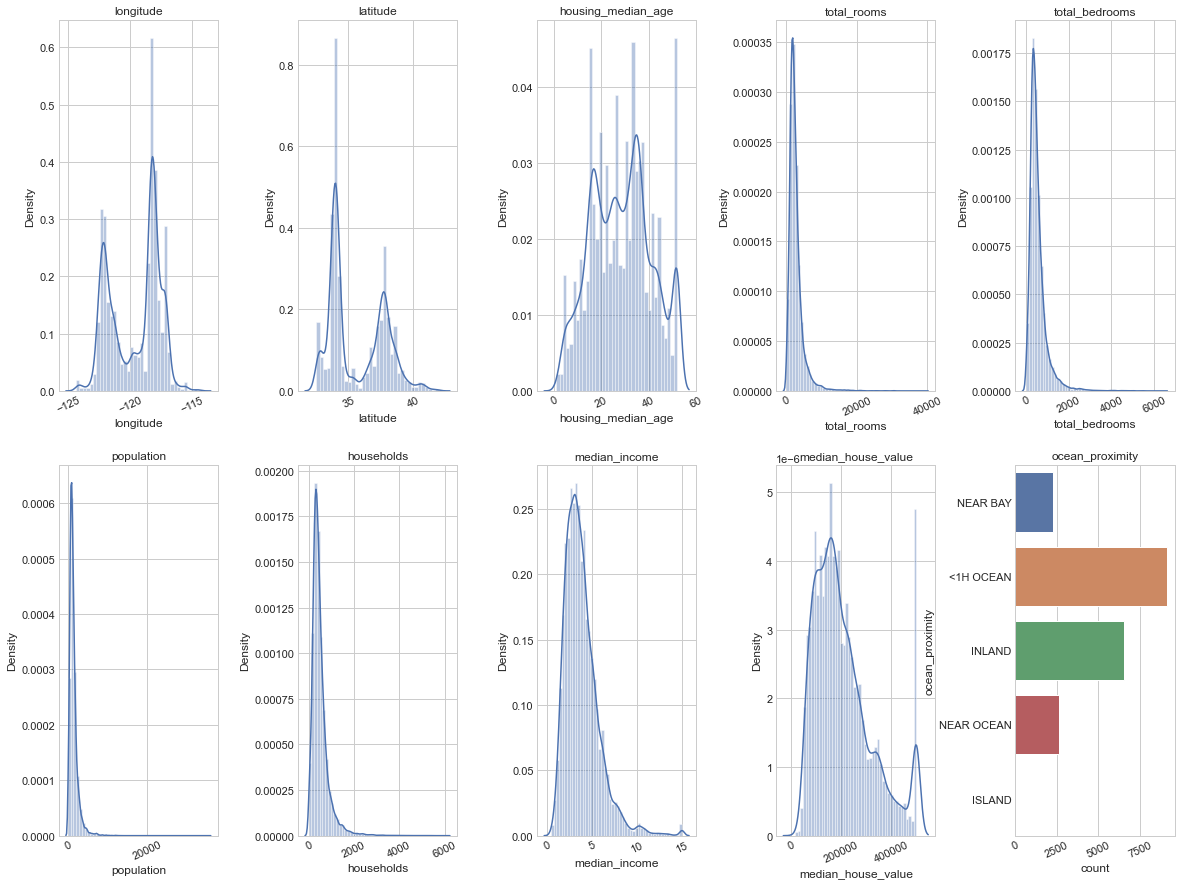

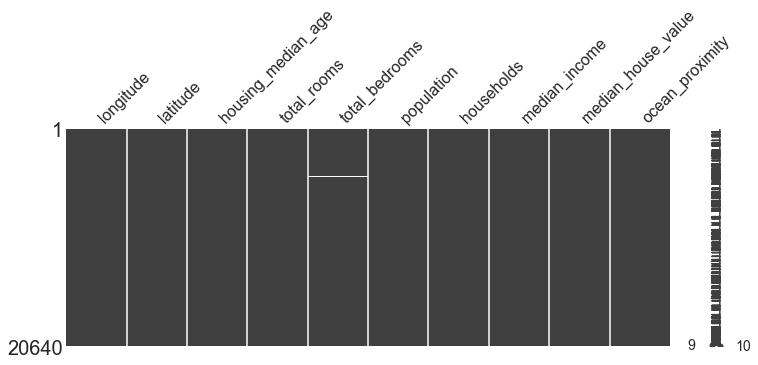

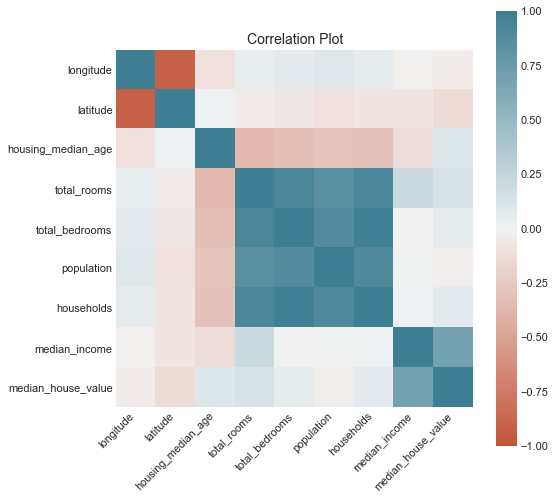

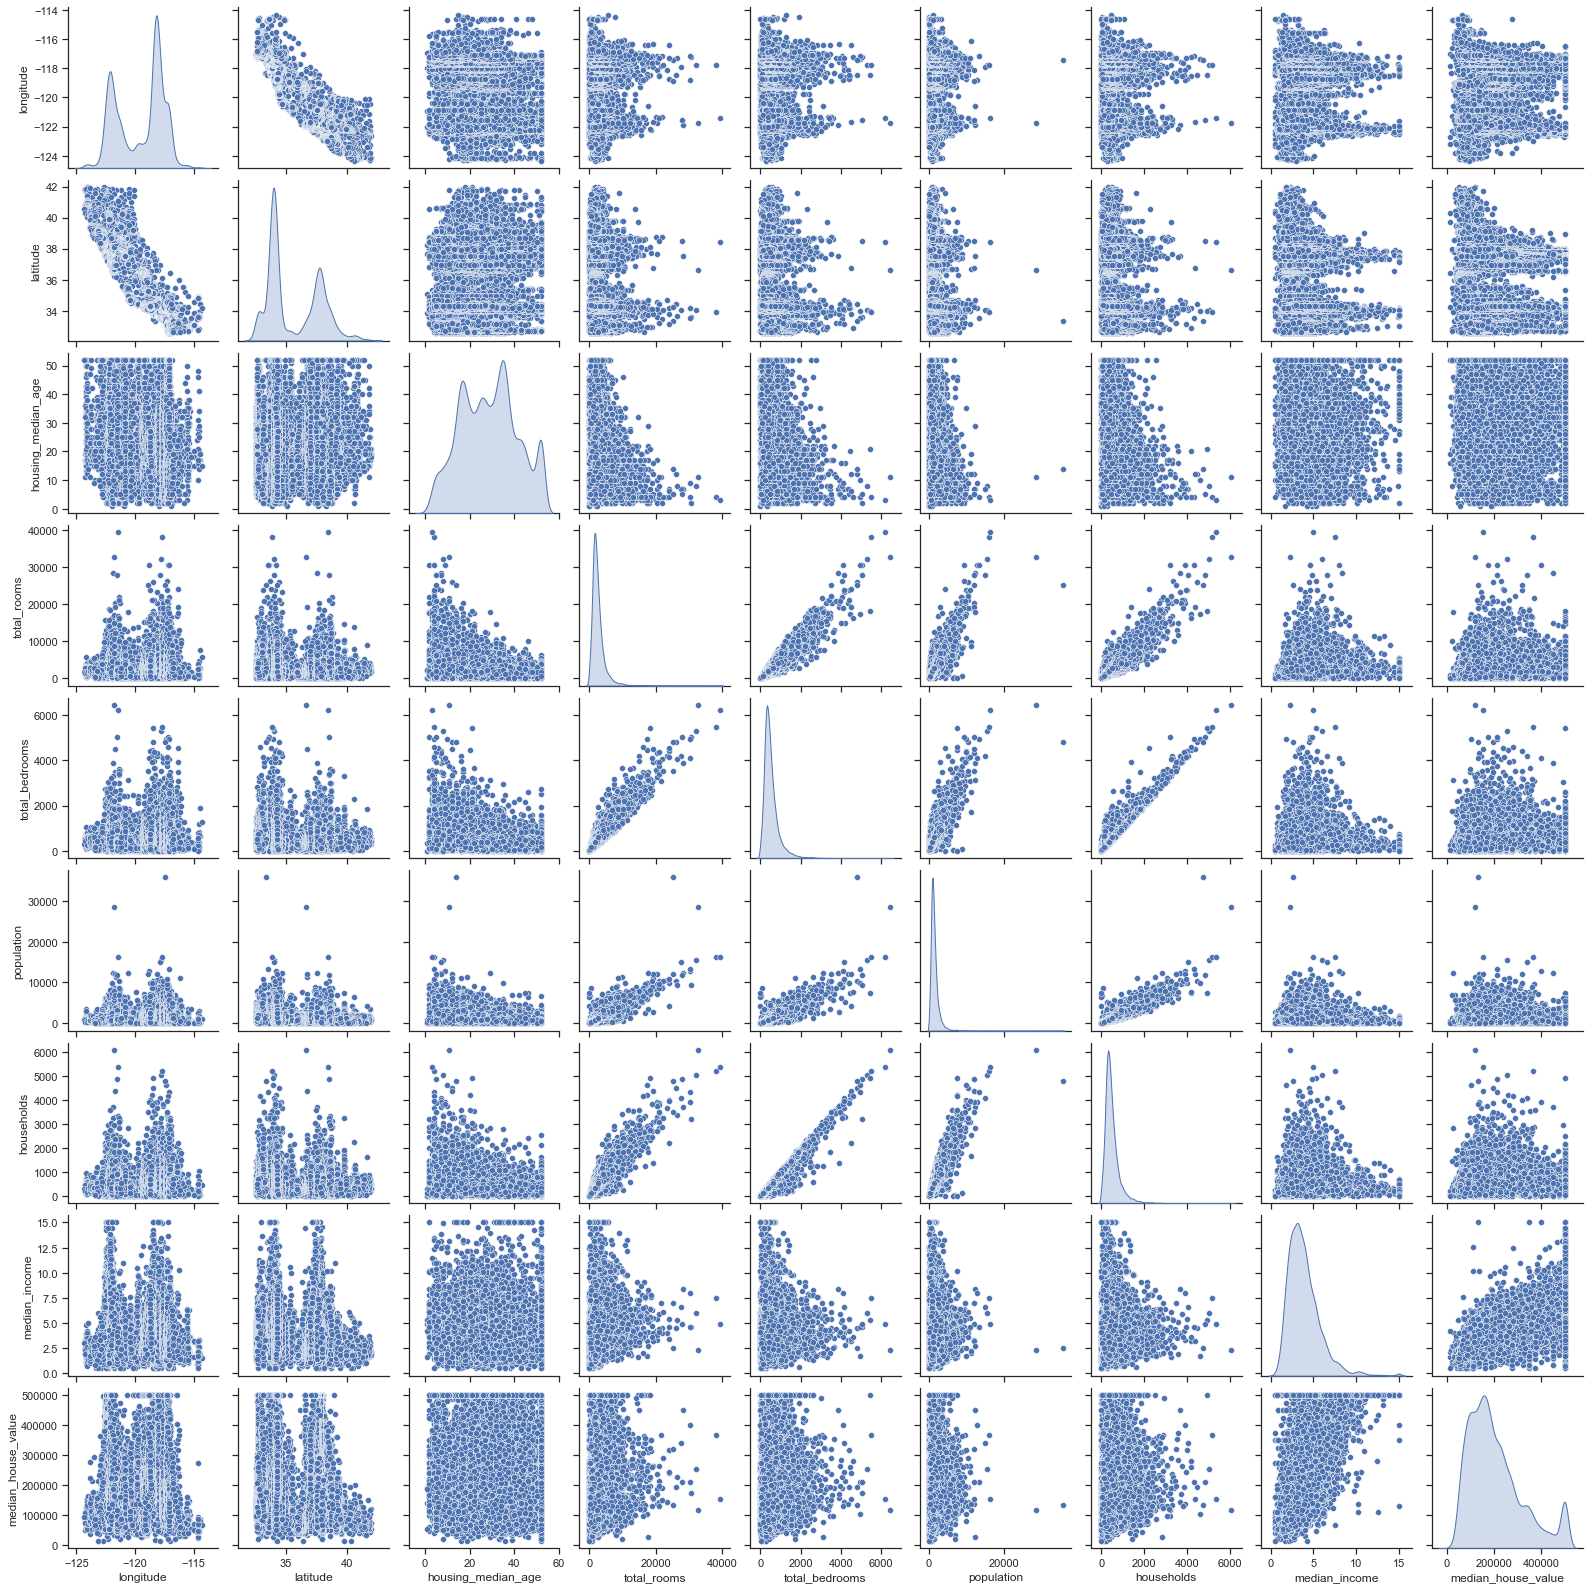

In [10]:
DATA_PATH = os.path.join("datasets", "housing")
eda = Eda(DATA_PATH)

eda.plot_distribution()
eda.plot_missingvalues()
eda.plot_correlation()
eda.get_scatterplot_matrix()